### Flood and rainfall data - Exploratory Data Analysis

#### API documentation
UK Environment Agency provides a number of APIs to access real-time data. Rainfall & flooding APIs give access to live rainfall and flood-monitoring data.

##### Rainfall API
https://environment.data.gov.uk/flood-monitoring/doc/rainfall

Data from ~1000 tipping bucket rain gauges giving accumulated totals (mm) / 15 mins
Data is updated once or twice daily.

To return the latest value for all measurements in CSV format:
> https://environment.data.gov.uk/flood-monitoring/data/readings.csv?parameter=rainfall&latest&_limit=1000

To return all readings for a single rainfall measurement since a specific time:
> https://environment.data.gov.uk/flood-monitoring/id/measures/52203-rainfall-tipping_bucket_raingauge-t-15_min-mm/readings?parameter=rainfall&since=2016-09-07T15:00:00Z&_limit=50

Attribution: 
*'this uses Environment Agency rainfall data from the real-time data API (Beta)'*

##### Flood Monitoring API
https://environment.data.gov.uk/flood-monitoring/doc/reference
- flood warnings and flood alerts
- flood areas which to which warnings or alerts apply
- measurements of water levels and flows
- information on the monitoring stations providing those measurements

Get the latest flood data (updated every 15 mins )
https://environment.data.gov.uk/flood-monitoring/data/readings?latest

### Rainfall API 

REST access via HTTP GET returns JSON file with these sections :

* context
* metadata
* item(s) - contains the measurements 

Get details of all the rainfall stations 
- use parameter = rainfall 
-  select '@id','label','lat','long', 'measures','catchmentName', 'riverName'

In [1]:
# Get all rainfall station details  

import io
import requests 
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from operator import itemgetter

root = 'https://environment.data.gov.uk/flood-monitoring'

stations = requests.get(f'{root}/id/stations?parameter=rainfall').json()['items']
# print(stations)

stations_df = pd.DataFrame.from_dict(stations)
stations_df2 = stations_df[['@id','label','lat','long', 'measures','catchmentName', 'riverName']]
display(stations_df2)


,@id,label,lat,long,measures,catchmentName,riverName
0,http://environment.data.gov.uk/flood-monitorin...,Rainfall station,52.186277,-1.171327,[{'@id': 'http://environment.data.gov.uk/flood...,NaN,NaN
1,http://environment.data.gov.uk/flood-monitorin...,Day Brook,52.986245,-1.163701,[{'@id': 'http://environment.data.gov.uk/flood...,Lower Trent and Erewash,Day Brook
2,http://environment.data.gov.uk/flood-monitorin...,Lechlade,51.692891,-1.672984,[{'@id': 'http://environment.data.gov.uk/flood...,Cotswolds,River Leach
3,http://environment.data.gov.uk/flood-monitorin...,Weldon Flood Storage Reservoir,52.493886,-0.649292,[{'@id': 'http://environment.data.gov.uk/flood...,Nene,Willow Brook
4,http://environment.data.gov.uk/flood-monitorin...,Rainfall station,52.731520,-0.995167,[{'@id': 'http://environment.data.gov.uk/flood...,NaN,NaN
...,...,...,...,...,...,...,...
1013,http://environment.data.gov.uk/flood-monitorin...,Rainfall station,51.241173,-0.593898,[{'@id': 'http://environment.data.gov.uk/flood...,NaN,NaN
1014,http://environment.data.gov.uk/flood-monitorin...,Rainfall station,52.029778,1.132036,[{'@id': 'http://environment.data.gov.uk/flood...,NaN,NaN
1015,http://environment.data.gov.uk/flood-monitorin...,Rainfall station,51.512527,-2.581394,[{'@id': 'http://environment.data.gov.uk/flood...,NaN,NaN
1016,http://environment.data.gov.uk/flood-monitorin...,Rainfall station,51.402706,-2.605876,[{'@id': 'http://environment.data.gov.uk/flood...,NaN,NaN


### Catchments and Rivers
Look at all the station details including level monitoring stations.

5408 stations are listed - details available
>['@id', 'RLOIid', 'catchmentName', 'dateOpened', 'easting', 'label',
>       'lat', 'long', 'measures', 'northing', 'notation', 'riverName',
>       'stageScale', 'stationReference', 'status', 'town', 'wiskiID',
>       'datumOffset', 'gridReference', 'downstageScale']

Generate a list of all the catchments and rivers.

In [3]:
# get all stations (rainfall and level ) and list the catchements 

all_stations = requests.get(f'{root}/id/stations').json()['items']
all_stations_df = pd.DataFrame.from_dict(all_stations)
# print(all_stations_df.columns)

all_stations_df2 = all_stations_df[['@id','label','lat','long', 'measures','catchmentName', 'riverName']]
# display(all_stations_df2['label'])
# display(all_stations_df2['measures'])

measures = all_stations_df2[~all_stations_df2['measures'].isna()]
print(measures['measures'])

for index, item in measures.iterrows():
    print(item)
    # print(type(item))
    # print(item)
#         if pd.isna(item):
            # print(item)
    #     for measure in item:
            # print(measure)
            # for d in item:
            #     print(d.get('@id', d.get('parameterName')))


# print(stations)

# catchments = all_stations_df2[['catchmentName', 'riverName']]
# display(catchments[~catchments['catchmentName'].isna()])

0       [{'@id': 'http://environment.data.gov.uk/flood...
1       [{'@id': 'http://environment.data.gov.uk/flood...
2       [{'@id': 'http://environment.data.gov.uk/flood...
3       [{'@id': 'http://environment.data.gov.uk/flood...
4       [{'@id': 'http://environment.data.gov.uk/flood...
                              ...                        
5403    [{'@id': 'http://environment.data.gov.uk/flood...
5404    [{'@id': 'http://environment.data.gov.uk/flood...
5405    [{'@id': 'http://environment.data.gov.uk/flood...
5406    [{'@id': 'http://environment.data.gov.uk/flood...
5407    [{'@id': 'http://environment.data.gov.uk/flood...
Name: measures, Length: 5392, dtype: object
@id              http://environment.data.gov.uk/flood-monitorin...
label                                              Bourton Dickler
lat                                                      51.874767
long                                                     -1.740083
measures         [{'@id': 'http://environment.data

In [4]:
all_stations_df.info()
all_stations_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5408 entries, 0 to 5407
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   @id               5408 non-null   object 
 1   RLOIid            2528 non-null   object 
 2   catchmentName     2528 non-null   object 
 3   dateOpened        2528 non-null   object 
 4   easting           4770 non-null   object 
 5   label             5408 non-null   object 
 6   lat               4770 non-null   object 
 7   long              4770 non-null   object 
 8   measures          5392 non-null   object 
 9   northing          4770 non-null   object 
 10  notation          5408 non-null   object 
 11  riverName         2528 non-null   object 
 12  stageScale        2528 non-null   object 
 13  stationReference  5408 non-null   object 
 14  status            2528 non-null   object 
 15  town              2369 non-null   object 
 16  wiskiID           2513 non-null   object 


,datumOffset
count,294.000000
mean,23.170861
std,25.808638
min,-5.233000
25%,2.725000
50%,13.000000
75%,37.301750
max,120.000000


Use long, lat and distance parameters to get stations within 10km of Bristol 

In [2]:
# Get local stations
# Bristol: 51.4545° N, 2.5879° W

lat = 51.45
long = -2.58
dist = 10

r = requests.get(f'{root}/id/stations?parameter=rainfall&lat={lat}&long={long}&dist={dist}').json()['items']
print(r)

local = pd.DataFrame.from_dict(r)
local = local[['@id','label','lat','long','notation','measures']].set_index('@id')
display(local)
local.index

[{'@id': 'http://environment.data.gov.uk/flood-monitoring/id/stations/53159', 'easting': 356850, 'gridReference': 'ST568632', 'label': 'Rainfall station', 'lat': 51.366659, 'long': -2.621201, 'measures': [{'@id': 'http://environment.data.gov.uk/flood-monitoring/id/measures/53159-rainfall-tipping_bucket_raingauge-t-15_min-mm', 'parameter': 'rainfall', 'parameterName': 'Rainfall', 'period': 900, 'qualifier': 'Tipping Bucket Raingauge', 'unitName': 'mm'}], 'northing': 163250, 'notation': '53159', 'stationReference': '53159'}, {'@id': 'http://environment.data.gov.uk/flood-monitoring/id/stations/52203', 'easting': 353750, 'gridReference': 'ST537679', 'label': 'Rainfall station', 'lat': 51.408672, 'long': -2.666341, 'measures': [{'@id': 'http://environment.data.gov.uk/flood-monitoring/id/measures/52203-rainfall-tipping_bucket_raingauge-t-15_min-mm', 'parameter': 'rainfall', 'parameterName': 'Rainfall', 'period': 900, 'qualifier': 'Tipping Bucket Raingauge', 'unitName': 'mm'}], 'northing': 16

,label,lat,long,notation,measures
@id,,,,,
http://environment.data.gov.uk/flood-monitoring/id/stations/53159,Rainfall station,51.366659,-2.621201,53159,[{'@id': 'http://environment.data.gov.uk/flood...
http://environment.data.gov.uk/flood-monitoring/id/stations/52203,Rainfall station,51.408672,-2.666341,52203,[{'@id': 'http://environment.data.gov.uk/flood...
http://environment.data.gov.uk/flood-monitoring/id/stations/53104,Rainfall station,51.538159,-2.480793,53104,[{'@id': 'http://environment.data.gov.uk/flood...
http://environment.data.gov.uk/flood-monitoring/id/stations/53107,Rainfall station,51.416755,-2.485269,53107,[{'@id': 'http://environment.data.gov.uk/flood...
http://environment.data.gov.uk/flood-monitoring/id/stations/531179,Rainfall station,51.460233,-2.609517,531179,[{'@id': 'http://environment.data.gov.uk/flood...
http://environment.data.gov.uk/flood-monitoring/id/stations/E7940,Rainfall station,51.512527,-2.581394,E7940,[{'@id': 'http://environment.data.gov.uk/flood...
http://environment.data.gov.uk/flood-monitoring/id/stations/E7970,Rainfall station,51.402706,-2.605876,E7970,[{'@id': 'http://environment.data.gov.uk/flood...


Index(['http://environment.data.gov.uk/flood-monitoring/id/stations/53159',
       'http://environment.data.gov.uk/flood-monitoring/id/stations/52203',
       'http://environment.data.gov.uk/flood-monitoring/id/stations/53104',
       'http://environment.data.gov.uk/flood-monitoring/id/stations/53107',
       'http://environment.data.gov.uk/flood-monitoring/id/stations/531179',
       'http://environment.data.gov.uk/flood-monitoring/id/stations/E7940',
       'http://environment.data.gov.uk/flood-monitoring/id/stations/E7970'],
      dtype='object', name='@id')

In [5]:
# Get all latest rainfall measurements

r = requests.get(f'{root}/data/readings.csv?parameter=rainfall&latest')

with open('latest.csv', 'w') as file:
    file.write(r.text)


In [99]:
print(r)
print(type(r))

dateTime,measure,value
2025-05-14T05:15:00Z,http://environment.data.gov.uk/flood-monitoring/id/measures/E7050-rainfall-tipping_bucket_raingauge-t-15_min-mm,0.000
2025-05-14T14:45:00Z,http://environment.data.gov.uk/flood-monitoring/id/measures/3680-rainfall-tipping_bucket_raingauge-t-15_min-mm,0.0
2025-05-14T14:45:00Z,http://environment.data.gov.uk/flood-monitoring/id/measures/3275-rainfall-tipping_bucket_raingauge-t-15_min-mm,0.0
2025-05-14T14:45:00Z,http://environment.data.gov.uk/flood-monitoring/id/measures/3167-rainfall-tipping_bucket_raingauge-t-15_min-mm,0.0
2025-05-14T14:45:00Z,http://environment.data.gov.uk/flood-monitoring/id/measures/3307-rainfall-tipping_bucket_raingauge-t-15_min-mm,0.0
2025-05-14T14:45:00Z,http://environment.data.gov.uk/flood-monitoring/id/measures/3404-rainfall-tipping_bucket_raingauge-t-15_min-mm,0.0
2025-05-14T14:45:00Z,http://environment.data.gov.uk/flood-monitoring/id/measures/3014-rainfall-tipping_bucket_raingauge-t-15_min-mm,0.0
2025-05-14T14:45:00Z,h

In [97]:
# Read the csv response text as dataframe 
latest = pd.read_csv(io.StringIO(r),
                     parse_dates=['dateTime'],
                     dtype={"measure":"str"}
                     )
print(latest)
latest.describe()
latest.info()

                     dateTime  \
0   2025-05-14 05:15:00+00:00   
1   2025-05-14 14:45:00+00:00   
2   2025-05-14 14:45:00+00:00   
3   2025-05-14 14:45:00+00:00   
4   2025-05-14 14:45:00+00:00   
..                        ...   
905 2025-05-14 08:45:00+00:00   
906 2025-05-14 14:45:00+00:00   
907 2025-05-14 14:45:00+00:00   
908 2025-05-14 14:45:00+00:00   
909 2025-05-14 14:45:00+00:00   

                                               measure  value  
0    http://environment.data.gov.uk/flood-monitorin...    0.0  
1    http://environment.data.gov.uk/flood-monitorin...    0.0  
2    http://environment.data.gov.uk/flood-monitorin...    0.0  
3    http://environment.data.gov.uk/flood-monitorin...    0.0  
4    http://environment.data.gov.uk/flood-monitorin...    0.0  
..                                                 ...    ...  
905  http://environment.data.gov.uk/flood-monitorin...    0.0  
906  http://environment.data.gov.uk/flood-monitorin...    0.0  
907  http://environment.dat

In [2]:
id = '52203-rainfall-tipping_bucket_raingauge-t-15_min-mm'

# https://environment.data.gov.uk/flood-monitoring/id/measures/52203-rainfall-tipping_bucket_raingauge-t-15_min-mm/readings?parameter=rainfall&since=2016-09-07T15:00:00Z&_limit=50

r = requests.get(f'{root}/id/measures/{id}/readings?parameter=rainfall&since=2025-04-22T00:00:00Z&_limit=10000').json()['items']

In [42]:
type(r)

list

In [47]:
# print the json output
formatted = json.dumps(r, indent=2)
print(formatted)

[
  {
    "@id": "http://environment.data.gov.uk/flood-monitoring/data/readings/52203-rainfall-tipping_bucket_raingauge-t-15_min-mm/2025-04-22T02-00-00Z",
    "dateTime": "2025-04-22T02:00:00Z",
    "measure": "http://environment.data.gov.uk/flood-monitoring/id/measures/52203-rainfall-tipping_bucket_raingauge-t-15_min-mm",
    "value": 0.0
  },
  {
    "@id": "http://environment.data.gov.uk/flood-monitoring/data/readings/52203-rainfall-tipping_bucket_raingauge-t-15_min-mm/2025-04-22T01-15-00Z",
    "dateTime": "2025-04-22T01:15:00Z",
    "measure": "http://environment.data.gov.uk/flood-monitoring/id/measures/52203-rainfall-tipping_bucket_raingauge-t-15_min-mm",
    "value": 0.0
  },
  {
    "@id": "http://environment.data.gov.uk/flood-monitoring/data/readings/52203-rainfall-tipping_bucket_raingauge-t-15_min-mm/2025-04-22T01-00-00Z",
    "dateTime": "2025-04-22T01:00:00Z",
    "measure": "http://environment.data.gov.uk/flood-monitoring/id/measures/52203-rainfall-tipping_bucket_raingauge

In [46]:
import datetime as dt

df = pd.json_normalize(r)
df.info()
# df['date'] = df['dateTime'].date
df.set_index(pd.DatetimeIndex(df['dateTime']), inplace=True)
df['dateTimeStr'] = pd.to_datetime(df.index).astype(str)
# df['date'] = dt.datetime.date(df.index)

display(df)
df.describe() 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379 entries, 0 to 1378
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   @id       1379 non-null   object 
 1   dateTime  1379 non-null   object 
 2   measure   1379 non-null   object 
 3   value     1379 non-null   float64
dtypes: float64(1), object(3)
memory usage: 43.2+ KB


,@id,dateTime,measure,value,dateTimeStr
dateTime,,,,,
2025-04-22 02:00:00+00:00,http://environment.data.gov.uk/flood-monitorin...,2025-04-22T02:00:00Z,http://environment.data.gov.uk/flood-monitorin...,0.0,2025-04-22 02:00:00+00:00
2025-04-22 01:15:00+00:00,http://environment.data.gov.uk/flood-monitorin...,2025-04-22T01:15:00Z,http://environment.data.gov.uk/flood-monitorin...,0.0,2025-04-22 01:15:00+00:00
2025-04-22 01:00:00+00:00,http://environment.data.gov.uk/flood-monitorin...,2025-04-22T01:00:00Z,http://environment.data.gov.uk/flood-monitorin...,0.0,2025-04-22 01:00:00+00:00
2025-04-22 00:30:00+00:00,http://environment.data.gov.uk/flood-monitorin...,2025-04-22T00:30:00Z,http://environment.data.gov.uk/flood-monitorin...,0.0,2025-04-22 00:30:00+00:00
2025-04-22 00:15:00+00:00,http://environment.data.gov.uk/flood-monitorin...,2025-04-22T00:15:00Z,http://environment.data.gov.uk/flood-monitorin...,0.0,2025-04-22 00:15:00+00:00
...,...,...,...,...,...
2025-05-06 07:15:00+00:00,http://environment.data.gov.uk/flood-monitorin...,2025-05-06T07:15:00Z,http://environment.data.gov.uk/flood-monitorin...,0.0,2025-05-06 07:15:00+00:00
2025-05-06 09:00:00+00:00,http://environment.data.gov.uk/flood-monitorin...,2025-05-06T09:00:00Z,http://environment.data.gov.uk/flood-monitorin...,0.0,2025-05-06 09:00:00+00:00
2025-05-06 08:15:00+00:00,http://environment.data.gov.uk/flood-monitorin...,2025-05-06T08:15:00Z,http://environment.data.gov.uk/flood-monitorin...,0.0,2025-05-06 08:15:00+00:00


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1379 entries, 2025-04-22 02:00:00+00:00 to 2025-05-06 08:30:00+00:00
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   @id          1379 non-null   object 
 1   dateTime     1379 non-null   object 
 2   measure      1379 non-null   object 
 3   value        1379 non-null   float64
 4   dateTimeStr  1379 non-null   object 
dtypes: float64(1), object(4)
memory usage: 64.6+ KB


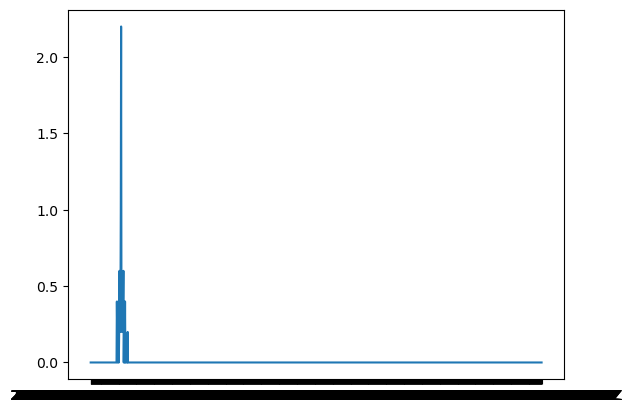

In [11]:
fig, ax = plt.subplots()
ax.plot(df.index,df['value'])

In [35]:

# measures_json = r.json()
measures = r['items']
measures_formatted = json.dumps(measures, indent=2)
print(measures_formatted)

TypeError: list indices must be integers or slices, not str